## 3. Implementierung der Hauptkomponentenanalyse


### a.)
Implementieren Sie ein Python-Modul, das eine Funktion zur Hauptkomponentenanalyse nach obigem Schema zur Verfügung stellt.



Implementierung als pca.py im gleichen Ordner

### b)
Testen Sie Ihr Modul innerhalb eines IPython-Notebooks am Datensatz Boston Housing. Lassen Sie dabei die Variable TGT weg. Stellen Sie Ihre Ergebnisse in einer Tabelle mit den Eigenwerten der Kovarianzmatrix (Achtung: die Diagonalelemente von  müssen dafür quadriert und durch n − 1 geteilt werden. Warum?), dem Anteil der zugehörigen Hauptkomponente an an der Gesamtvarianz (“erklärte Varianz”) und der kumulativen erklärten Varianz dar, d.h. welchen Varianzanteil die ersten  Komponenten zusammen erklären. Wieviele Dimensionen können Sie weglassen, wenn Sie 10%, 5% und 1% Fehler bei der Dimensionsreduktion zulassen?

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B',
        'LSTAT', 'TGT']
boston = pd.read_csv(url, sep=' ', skipinitialspace=True, header=None, names=cols,
                     index_col=False)

In [3]:
response = boston.TGT
features = boston.drop(columns="TGT")

In [4]:
covmatrix_eigen_vals = np.linalg.eigvals(np.cov(features, rowvar=False))
covmatrix_eigen_vals[::-1].sort()

In [5]:
from pca import PCA

pca = PCA()
pca.fit(features)

explained_variance = pca.get_explained_variance()
share_of_variance = explained_variance / np.sum(explained_variance)
cumulated_explained_variance = np.cumsum(explained_variance) / np.sum(explained_variance)
pc_scores = pca.get_principal_component_scores()

In [6]:
pd.DataFrame({
    "Eigenwerte der Kovarianzmatrix": covmatrix_eigen_vals.tolist(),
    "Erklärte Varianz": share_of_variance.tolist(),
    "Kummulierte Varianz": cumulated_explained_variance.tolist()
})

,Eigenwerte der Kovarianzmatrix,Erklärte Varianz,Kummulierte Varianz
0,30889.911261,0.471296,0.471296
1,6250.330061,0.110252,0.581548
2,818.363958,0.095586,0.677134
3,266.684838,0.065967,0.743101
4,49.831528,0.064217,0.807318
5,27.876793,0.050570,0.857888
6,16.063386,0.041181,0.899069
7,9.527318,0.030469,0.929538
8,3.273332,0.021303,0.950841
9,1.180942,0.016941,0.967783


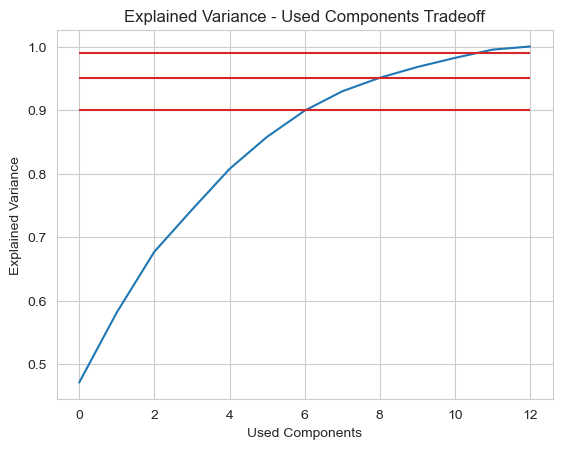

In [7]:
plt.plot(cumulated_explained_variance, c="tab:blue")
plt.hlines(0.9, 0, 12, colors="tab:red")
plt.hlines(0.95, 0, 12, colors="tab:red")
plt.hlines(0.99, 0, 12, colors="tab:red")
plt.xlabel("Used Components")
plt.ylabel("Explained Variance")
plt.title("Explained Variance - Used Components Tradeoff")
plt.show()

### c.)
Berechnen Sie die Matrix der Korrelationskoeffizienten für die transformierten Variablen und interpretieren Sie das Ergebnis.



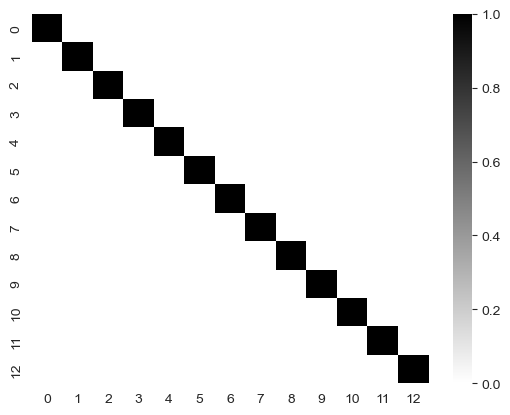

In [8]:
sns.heatmap(
    np.corrcoef(pc_scores, rowvar=False),
    cmap="binary"
)
plt.show()

Hauptkomponenten sind orthogonal --> keine Korrelation

### d.)
Berechnen Sie den Korrelationskoeffizienten der Projektionen auf die ersten drei Hauptkomponenten mit den ursprünglichen Variablen. Interpretieren Sie Ihr Ergebnis.



In [9]:
var_correlation = []

for i in range(3):
    var_correlation.append(
        np.corrcoef(pc_scores[:, i], boston, rowvar=False)[0, :]
    )

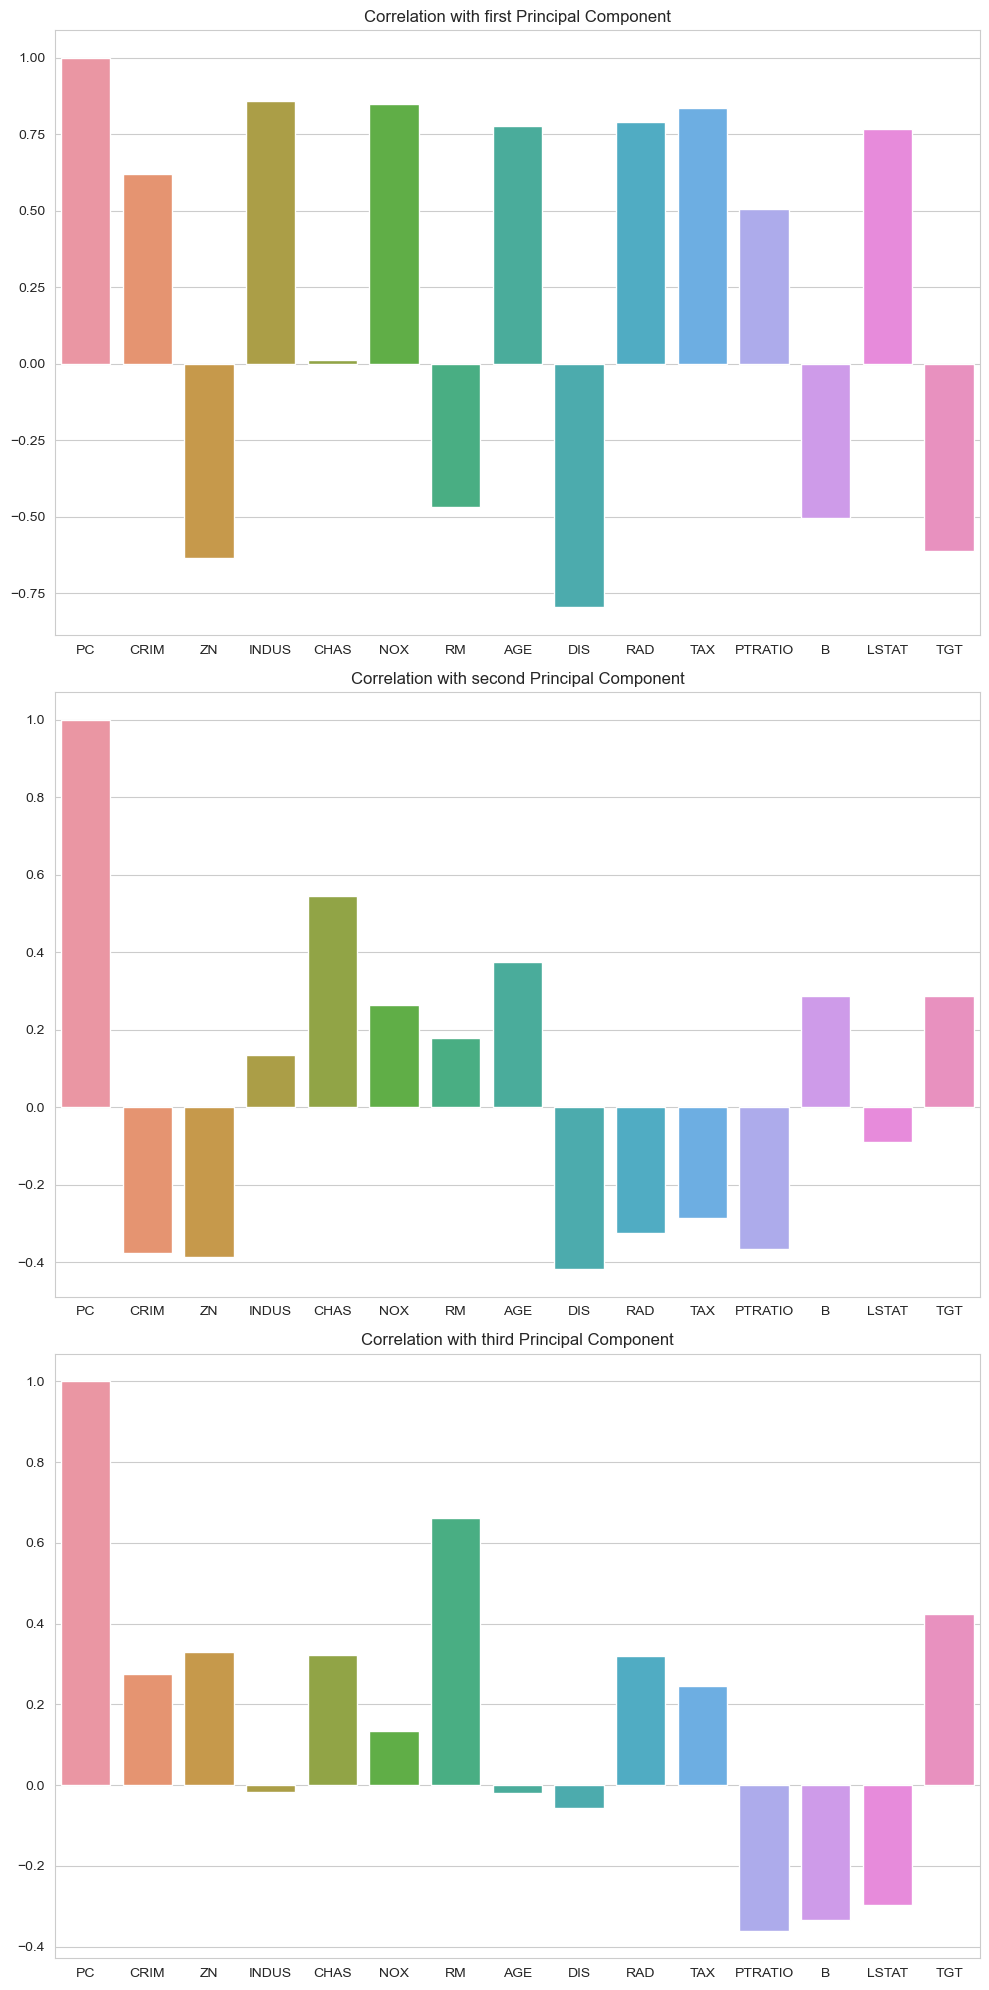

In [10]:
fig, axs = plt.subplots(3)
fig.set_size_inches(10, 20)

cols = ["PC"] + list(boston.columns)

sns.barplot(x = cols, y = var_correlation[0], ax=axs[0])
sns.barplot(x = cols, y = var_correlation[1], ax=axs[1])
sns.barplot(x = cols, y = var_correlation[2], ax=axs[2])

axs[0].title.set_text("Correlation with first Principal Component")
axs[1].title.set_text("Correlation with second Principal Component")
axs[2].title.set_text("Correlation with third Principal Component")

fig.tight_layout()
plt.show()

### e.)
Stellen Sie die ersten beiden der neuen Variablen als Scatterplot dar (am besten in Pandas-Dataframe importieren). Plotten Sie dabei alle Datenpunkte mit einem Hauspreis oberhalb des Medians aller Hauspreise in einer anderen Farbe als die Datenpunkte unterhalb. Eignen sich die beiden neuen Variablen zur Vorhersage des Hauspreises?



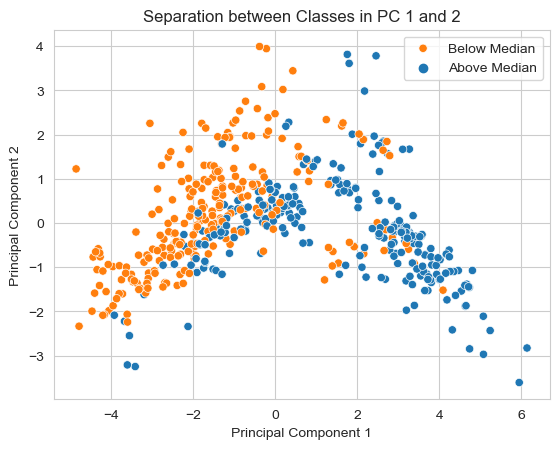

In [11]:
median_price = [1 if price >= np.median(response) else 0 for price in response]

sns.scatterplot(x=pc_scores[:, 0], y=pc_scores[:, 1], hue=median_price)

plt.title("Separation between Classes in PC 1 and 2")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(labels=["Below Median", "Above Median"])

plt.show()

In [13]:
%load_ext version_information

In [14]:
%version_information

Software versions
Python 3.10.6 64bit [MSC v.1916 64 bit (AMD64)]
IPython 8.4.0
OS Windows 10 10.0.19044 SP0
Sun Oct 30 10:25:10 2022 Mitteleuropäische Zeit